## Karadeniz Bölgesi İçin Kira Tahmin Uygulaması

In [1]:
import pandas as pd
import numpy as np

In [2]:
def drop_columns(df, cols):
    """
    Verilen sütunları DataFrame'den siler ve yeni bir DataFrame döner.
    """
    return df.drop(columns=cols, errors='ignore')

In [3]:
df = pd.read_csv('hepsiemlak.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1924 non-null   object 
 1   photo-count                          1914 non-null   float64
 2   list-view-price                      1924 non-null   object 
 3   list-view-date                       1924 non-null   object 
 4   left                                 1924 non-null   object 
 5   celly                                1924 non-null   object 
 6   celly 2                              1924 non-null   object 
 7   celly 3                              1924 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1717 non-null   object 
 10  he-lazy-image src                    1717 non-null   object 
 11  eids-badge__label             

In [5]:
df.head()

,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 3,celly 4,eids-badge__description,he-lazy-image src,eids-badge__label,list-view-header,list-view-location,img-wrp href,he-lazy-image src 2,listing-card--owner-info__firm-name,he-lazy-image src 3
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,32.0,18.500,29-06-2025,Kiralık Daire,1 +\n 1,65 m²,3\n Yaşında,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Aziziye Mahallesinde Kiralık Eşyalı 1+1 Daire,Düzce / Merkez / Aziziye Mah.,NaN,NaN,NaN,NaN
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,35.0,18.000,06-07-2025,Kiralık Daire,3 +\n 1,140 m²,14\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Düzce Kiremitocağı Mahallesinde Kiralık 3+...,Düzce / Merkez / Kiremitocağı Mah.,https://www.hepsiemlak.com/emlak-ofisi/bora-em...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Bora Emlak,NaN
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,20.0,12.500,05-07-2025,Kiralık Daire,3 +\n 1,120 m²,25\n Yaşında,En Üst Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Havva Genç Gayrimenkul'den Kültür Mah.Kiralık ...,Düzce / Merkez / Kültür Mah.,https://www.hepsiemlak.com/emlak-ofisi/havva-g...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Havva Genç Gayrimenkul Ve Danışmanlık,NaN
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,26.0,16.000,05-07-2025,Kiralık Daire,2 +\n 1,100 m²,5\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Epa Uğur'dan Derelitütüncüde 3.Kat Kiralık 2+1...,Düzce / Merkez / Derelitütüncü Mah.,https://www.hepsiemlak.com/emlak-ofisi/epa-ugu...,https://hecdn01.hemlak.com/mncropresize/182/13...,Epa Uğur Gayrimenkul,https://hecdnnw.hemlak.com/mncropresize/77/67/...
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,26.0,20.000,01-07-2025,Kiralık Daire,2 +\n 1,85 m²,11\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Karaca Hacı Musa Mahallesi Memursen'de Kiralık...,Düzce / Merkez / Kara Hacımusa Mah.,https://www.hepsiemlak.com/emlak-ofisi/salmak-...,https://hecdn01.hemlak.com/mncropresize/182/13...,Salmak Emlak,https://hecdnnw.hemlak.com/mncropresize/77/67/...


In [6]:
df.columns

Index(['img-link href', 'photo-count', 'list-view-price', 'list-view-date',
       'left', 'celly', 'celly 2', 'celly 3', 'celly 4',
       'eids-badge__description', 'he-lazy-image src', 'eids-badge__label',
       'list-view-header', 'list-view-location', 'img-wrp href',
       'he-lazy-image src 2', 'listing-card--owner-info__firm-name',
       'he-lazy-image src 3'],
      dtype='object')

In [7]:
cols = ['photo-count', 'list-view-date','left','eids-badge__description', 'he-lazy-image src', 'eids-badge__label','list-view-header', 'list-view-location', 'img-wrp href','he-lazy-image src 2', 'listing-card--owner-info__firm-name','he-lazy-image src 3']
drop_columns(df, cols)

,img-link href,list-view-price,celly,celly 2,celly 3,celly 4
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,18.500,1 +\n 1,65 m²,3\n Yaşında,Ara Kat
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,18.000,3 +\n 1,140 m²,14\n Yaşında,2. Kat
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,12.500,3 +\n 1,120 m²,25\n Yaşında,En Üst Kat
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,16.000,2 +\n 1,100 m²,5\n Yaşında,3. Kat
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,20.000,2 +\n 1,85 m²,11\n Yaşında,3. Kat
...,...,...,...,...,...,...
1919,https://www.hepsiemlak.com/rize-merkez-tophane...,18.000,3 +\n 1,130 m²,24\n Yaşında,2. Kat
1920,https://www.hepsiemlak.com/rize-merkez-kaplica...,12.000,1 +\n 1,70 m²,3\n Yaşında,5. Kat
1921,https://www.hepsiemlak.com/rize-merkez-bogaz-k...,25.000,2 +\n 1,120 m²,7\n Yaşında,4. Kat
1922,https://www.hepsiemlak.com/rize-merkez-yenikoy...,18.000,3 +\n 1,130 m²,16\n Yaşında,5. Kat


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1924 non-null   object 
 1   photo-count                          1914 non-null   float64
 2   list-view-price                      1924 non-null   object 
 3   list-view-date                       1924 non-null   object 
 4   left                                 1924 non-null   object 
 5   celly                                1924 non-null   object 
 6   celly 2                              1924 non-null   object 
 7   celly 3                              1924 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1717 non-null   object 
 10  he-lazy-image src                    1717 non-null   object 
 11  eids-badge__label             

In [9]:
print(df['img-link href'].unique())

['https://www.hepsiemlak.com/duzce-merkez-aziziye-kiralik/daire/151069-15'
 'https://www.hepsiemlak.com/duzce-merkez-kiremitocagi-kiralik/daire/94492-311'
 'https://www.hepsiemlak.com/duzce-merkez-kultur-kiralik/daire/140272-680'
 ...
 'https://www.hepsiemlak.com/rize-merkez-bogaz-kiralik/daire/56922-1729'
 'https://www.hepsiemlak.com/rize-merkez-yenikoy-kiralik/daire/56922-1743'
 'https://www.hepsiemlak.com/rize-pazar-pazar-kiralik/daire/0-37829930']


In [10]:
df['location'] = df['img-link href'].apply(lambda x: x.split('/')[3])
df['city'] = df['location'].str.split('-').str[0]
df['district'] = df['location'].str.split('-').str[1]
df['neighborhood'] = df['location'].str.split('-').str[2:-1]
df['neighborhood'] = df['neighborhood'].apply(lambda x: '_'.join(x))

In [11]:
drop_columns(df, ['location', 'img-link href'])

,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 3,celly 4,eids-badge__description,he-lazy-image src,eids-badge__label,list-view-header,list-view-location,img-wrp href,he-lazy-image src 2,listing-card--owner-info__firm-name,he-lazy-image src 3,city,district,neighborhood
0,32.0,18.500,29-06-2025,Kiralık Daire,1 +\n 1,65 m²,3\n Yaşında,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Aziziye Mahallesinde Kiralık Eşyalı 1+1 Daire,Düzce / Merkez / Aziziye Mah.,NaN,NaN,NaN,NaN,duzce,merkez,aziziye
1,35.0,18.000,06-07-2025,Kiralık Daire,3 +\n 1,140 m²,14\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Düzce Kiremitocağı Mahallesinde Kiralık 3+...,Düzce / Merkez / Kiremitocağı Mah.,https://www.hepsiemlak.com/emlak-ofisi/bora-em...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Bora Emlak,NaN,duzce,merkez,kiremitocagi
2,20.0,12.500,05-07-2025,Kiralık Daire,3 +\n 1,120 m²,25\n Yaşında,En Üst Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Havva Genç Gayrimenkul'den Kültür Mah.Kiralık ...,Düzce / Merkez / Kültür Mah.,https://www.hepsiemlak.com/emlak-ofisi/havva-g...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Havva Genç Gayrimenkul Ve Danışmanlık,NaN,duzce,merkez,kultur
3,26.0,16.000,05-07-2025,Kiralık Daire,2 +\n 1,100 m²,5\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Epa Uğur'dan Derelitütüncüde 3.Kat Kiralık 2+1...,Düzce / Merkez / Derelitütüncü Mah.,https://www.hepsiemlak.com/emlak-ofisi/epa-ugu...,https://hecdn01.hemlak.com/mncropresize/182/13...,Epa Uğur Gayrimenkul,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce,merkez,derelitutuncu
4,26.0,20.000,01-07-2025,Kiralık Daire,2 +\n 1,85 m²,11\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Karaca Hacı Musa Mahallesi Memursen'de Kiralık...,Düzce / Merkez / Kara Hacımusa Mah.,https://www.hepsiemlak.com/emlak-ofisi/salmak-...,https://hecdn01.hemlak.com/mncropresize/182/13...,Salmak Emlak,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce,merkez,kara_hacimusa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,14.0,18.000,10-04-2025,Kiralık Daire,3 +\n 1,130 m²,24\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Rize Merkez Çarşı İçin De 3+1 130m2 Dairemiz ...,Rize / Merkez / Tophane Mah.,https://www.hepsiemlak.com/emlak-ofisi/cetin-e...,https://hecdn01.hemlak.com/mncropresize/182/13...,Çetin Emlak,https://www.hepsiemlak.com/img/loadings/noImag...,rize,merkez,tophane
1920,11.0,12.000,27-05-2025,Kiralık Daire,1 +\n 1,70 m²,3\n Yaşında,5. Kat,NaN,NaN,NaN,Rize Kaplıca Mahallesi 5. Kat 1+1 Kiralık Daire,Rize / Merkez / Kaplıca Mah.,NaN,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize,merkez,kaplica
1921,15.0,25.000,16-05-2025,Kiralık Daire,2 +\n 1,120 m²,7\n Yaşında,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Emlak Dünyasından Ful Eşyalı Kiralık Daire,Rize / Merkez / Boğaz Mah.,NaN,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize,merkez,bogaz
1922,12.0,18.000,21-04-2025,Kiralık Daire,3 +\n 1,130 m²,16\n Yaşında,5. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,Emlak Dünyasından Merkezde Ful Eşyalı Daire 3+1,Rize / Merkez / Yeniköy Mah.,NaN,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize,merkez,yenikoy


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1924 non-null   object 
 1   photo-count                          1914 non-null   float64
 2   list-view-price                      1924 non-null   object 
 3   list-view-date                       1924 non-null   object 
 4   left                                 1924 non-null   object 
 5   celly                                1924 non-null   object 
 6   celly 2                              1924 non-null   object 
 7   celly 3                              1924 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1717 non-null   object 
 10  he-lazy-image src                    1717 non-null   object 
 11  eids-badge__label             

In [13]:
print(df[['city', 'district', 'neighborhood']].sample(50))

           city  district             neighborhood
1071     samsun   ilkadim                kilicdede
1651      tokat    merkez               yesilirmak
1341     samsun   ilkadim                    cedit
11        duzce    merkez                  kocyazi
430   zonguldak    eregli                   omerli
1862    trabzon  akcaabat                   mersin
88        duzce    merkez                 beyciler
1090     samsun    atakum               cumhuriyet
1183     samsun    atakum                esenevler
1709      tokat    merkez                hocaahmet
1237     samsun    atakum               cumhuriyet
1047      corum    merkez             bahcelievler
719   zonguldak     kozlu                    fatih
741   zonguldak    merkez               mithatpasa
151        bolu    merkez               borazanlar
1641      tokat    merkez               mahmutpasa
593   zonguldak     kozlu                    fatih
1774      tokat    merkez                karsiyaka
1586      tokat    merkez      

In [14]:
print(df.columns)

Index(['img-link href', 'photo-count', 'list-view-price', 'list-view-date',
       'left', 'celly', 'celly 2', 'celly 3', 'celly 4',
       'eids-badge__description', 'he-lazy-image src', 'eids-badge__label',
       'list-view-header', 'list-view-location', 'img-wrp href',
       'he-lazy-image src 2', 'listing-card--owner-info__firm-name',
       'he-lazy-image src 3', 'location', 'city', 'district', 'neighborhood'],
      dtype='object')


In [15]:
print(df['celly'].unique())

['1 +\n                          1' '3 +\n                          1'
 '2 +\n                          1' '2 +\n                          0'
 '4 +\n                          1' '4 +\n                          2'
 '3 +\n                          0' '4 +\n                          0'
 'Stüdyo' '1 +\n                          10'
 '8 +\n                          10' '5 +\n                          1'
 '18 +\n                          6' '6 +\n                          1'
 '3 +\n                          2' '2 +\n                          946'
 '5 +\n                          2' '2 +\n                          2'
 '11 +\n                          1' '3 +\n                          10']


In [16]:
df['celly'] = df['celly'].apply(lambda x: x.replace('Stüdyo', '1 + 0'))
df['celly'] = df['celly'].apply(lambda x: x.replace('\n', ''))
df['room'] = df['celly'].apply(lambda x: x.split('+')[0]).astype(int)
df['living_room'] = df['celly'].apply(lambda x: x.split('+')[1]).astype(int)

In [17]:
print(df['room'].unique())
print(df['living_room'].unique())

[ 1  3  2  4  8  5 18  6 11]
[  1   0   2  10   6 946]


In [18]:
drop_columns(df, ['celly'])

,img-link href,photo-count,list-view-price,list-view-date,left,celly 2,celly 3,celly 4,eids-badge__description,he-lazy-image src,...,img-wrp href,he-lazy-image src 2,listing-card--owner-info__firm-name,he-lazy-image src 3,location,city,district,neighborhood,room,living_room
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,32.0,18.500,29-06-2025,Kiralık Daire,65 m²,3\n Yaşında,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,NaN,NaN,NaN,duzce-merkez-aziziye-kiralik,duzce,merkez,aziziye,1,1
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,35.0,18.000,06-07-2025,Kiralık Daire,140 m²,14\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://www.hepsiemlak.com/emlak-ofisi/bora-em...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Bora Emlak,NaN,duzce-merkez-kiremitocagi-kiralik,duzce,merkez,kiremitocagi,3,1
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,20.0,12.500,05-07-2025,Kiralık Daire,120 m²,25\n Yaşında,En Üst Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://www.hepsiemlak.com/emlak-ofisi/havva-g...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Havva Genç Gayrimenkul Ve Danışmanlık,NaN,duzce-merkez-kultur-kiralik,duzce,merkez,kultur,3,1
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,26.0,16.000,05-07-2025,Kiralık Daire,100 m²,5\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://www.hepsiemlak.com/emlak-ofisi/epa-ugu...,https://hecdn01.hemlak.com/mncropresize/182/13...,Epa Uğur Gayrimenkul,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-derelitutuncu-kiralik,duzce,merkez,derelitutuncu,2,1
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,26.0,20.000,01-07-2025,Kiralık Daire,85 m²,11\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://www.hepsiemlak.com/emlak-ofisi/salmak-...,https://hecdn01.hemlak.com/mncropresize/182/13...,Salmak Emlak,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-kara-hacimusa-kiralik,duzce,merkez,kara_hacimusa,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,https://www.hepsiemlak.com/rize-merkez-tophane...,14.0,18.000,10-04-2025,Kiralık Daire,130 m²,24\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://www.hepsiemlak.com/emlak-ofisi/cetin-e...,https://hecdn01.hemlak.com/mncropresize/182/13...,Çetin Emlak,https://www.hepsiemlak.com/img/loadings/noImag...,rize-merkez-tophane-kiralik,rize,merkez,tophane,3,1
1920,https://www.hepsiemlak.com/rize-merkez-kaplica...,11.0,12.000,27-05-2025,Kiralık Daire,70 m²,3\n Yaşında,5. Kat,NaN,NaN,...,NaN,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize-merkez-kaplica-kiralik,rize,merkez,kaplica,1,1
1921,https://www.hepsiemlak.com/rize-merkez-bogaz-k...,15.0,25.000,16-05-2025,Kiralık Daire,120 m²,7\n Yaşında,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize-merkez-bogaz-kiralik,rize,merkez,bogaz,2,1
1922,https://www.hepsiemlak.com/rize-merkez-yenikoy...,12.0,18.000,21-04-2025,Kiralık Daire,130 m²,16\n Yaşında,5. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize-merkez-yenikoy-kiralik,rize,merkez,yenikoy,3,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1924 non-null   object 
 1   photo-count                          1914 non-null   float64
 2   list-view-price                      1924 non-null   object 
 3   list-view-date                       1924 non-null   object 
 4   left                                 1924 non-null   object 
 5   celly                                1924 non-null   object 
 6   celly 2                              1924 non-null   object 
 7   celly 3                              1924 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1717 non-null   object 
 10  he-lazy-image src                    1717 non-null   object 
 11  eids-badge__label             

In [20]:
print(df['celly 2'].unique())

['65 m²' '140 m²' '120 m²' '100 m²' '85 m²' '60 m²' '55 m²' '97 m²'
 '90 m²' '87 m²' '110 m²' '130 m²' '75 m²' '54 m²' '180 m²' '125 m²'
 '135 m²' '50 m²' '250 m²' '145 m²' '102 m²' '95 m²' '86 m²' '64 m²'
 '105 m²' '70 m²' '170 m²' '139 m²' '149 m²' '160 m²' '45 m²' '205 m²'
 '80 m²' '49 m²' '146 m²' '40 m²' '168 m²' '210 m²' '52 m²' '165 m²'
 '115 m²' '71 m²' '51 m²' '77 m²' '150 m²' '72 m²' '290 m²' '104 m²'
 '68 m²' '76 m²' '117 m²' '155 m²' '195 m²' '185 m²' '147 m²' '200 m²'
 '89 m²' '30 m²' '109 m²' '88 m²' '20 m²' '39 m²' '148 m²' '57 m²'
 '220 m²' '144 m²' '73 m²' '58 m²' '63 m²' '35 m²' '81 m²' '1.000 m²'
 '53 m²' '79 m²' '127 m²' '126 m²' '42 m²' '82 m²' '67 m²' '56 m²'
 '260 m²' '62 m²' '240 m²' '84 m²' '101 m²' '83 m²' '300 m²' '190 m²'
 '61 m²' '175 m²' '47 m²' '159 m²' '134 m²' '154 m²' '106 m²' '118 m²'
 '48 m²' '43 m²' '128 m²' '132 m²' '157 m²' '66 m²' '46 m²' '167 m²'
 '108 m²' '164 m²' '151 m²' '124 m²' '15 m²' '4.230 m²' '600 m²' '31 m²'
 '38 m²' '16 m²' '500 m²' '

In [21]:
df['area'] = df['celly 2'].apply(lambda x: x.split(' ')[0].replace('.', '')).astype(int)

In [22]:
print(df['area'].unique())

[  65  140  120  100   85   60   55   97   90   87  110  130   75   54
  180  125  135   50  250  145  102   95   86   64  105   70  170  139
  149  160   45  205   80   49  146   40  168  210   52  165  115   71
   51   77  150   72  290  104   68   76  117  155  195  185  147  200
   89   30  109   88   20   39  148   57  220  144   73   58   63   35
   81 1000   53   79  127  126   42   82   67   56  260   62  240   84
  101   83  300  190   61  175   47  159  134  154  106  118   48   43
  128  132  157   66   46  167  108  164  151  124   15 4230  600   31
   38   16  500  188]


In [23]:
drop_columns(df, ['celly 2'])

,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 3,celly 4,eids-badge__description,he-lazy-image src,...,he-lazy-image src 2,listing-card--owner-info__firm-name,he-lazy-image src 3,location,city,district,neighborhood,room,living_room,area
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,32.0,18.500,29-06-2025,Kiralık Daire,1 + 1,3\n Yaşında,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,NaN,NaN,duzce-merkez-aziziye-kiralik,duzce,merkez,aziziye,1,1,65
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,35.0,18.000,06-07-2025,Kiralık Daire,3 + 1,14\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Bora Emlak,NaN,duzce-merkez-kiremitocagi-kiralik,duzce,merkez,kiremitocagi,3,1,140
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,20.0,12.500,05-07-2025,Kiralık Daire,3 + 1,25\n Yaşında,En Üst Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Havva Genç Gayrimenkul Ve Danışmanlık,NaN,duzce-merkez-kultur-kiralik,duzce,merkez,kultur,3,1,120
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,26.0,16.000,05-07-2025,Kiralık Daire,2 + 1,5\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdn01.hemlak.com/mncropresize/182/13...,Epa Uğur Gayrimenkul,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-derelitutuncu-kiralik,duzce,merkez,derelitutuncu,2,1,100
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,26.0,20.000,01-07-2025,Kiralık Daire,2 + 1,11\n Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdn01.hemlak.com/mncropresize/182/13...,Salmak Emlak,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-kara-hacimusa-kiralik,duzce,merkez,kara_hacimusa,2,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,https://www.hepsiemlak.com/rize-merkez-tophane...,14.0,18.000,10-04-2025,Kiralık Daire,3 + 1,24\n Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdn01.hemlak.com/mncropresize/182/13...,Çetin Emlak,https://www.hepsiemlak.com/img/loadings/noImag...,rize-merkez-tophane-kiralik,rize,merkez,tophane,3,1,130
1920,https://www.hepsiemlak.com/rize-merkez-kaplica...,11.0,12.000,27-05-2025,Kiralık Daire,1 + 1,3\n Yaşında,5. Kat,NaN,NaN,...,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize-merkez-kaplica-kiralik,rize,merkez,kaplica,1,1,70
1921,https://www.hepsiemlak.com/rize-merkez-bogaz-k...,15.0,25.000,16-05-2025,Kiralık Daire,2 + 1,7\n Yaşında,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize-merkez-bogaz-kiralik,rize,merkez,bogaz,2,1,120
1922,https://www.hepsiemlak.com/rize-merkez-yenikoy...,12.0,18.000,21-04-2025,Kiralık Daire,3 + 1,16\n Yaşında,5. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdn01.hemlak.com/mncropresize/182/13...,NaN,NaN,rize-merkez-yenikoy-kiralik,rize,merkez,yenikoy,3,1,130


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1924 non-null   object 
 1   photo-count                          1914 non-null   float64
 2   list-view-price                      1924 non-null   object 
 3   list-view-date                       1924 non-null   object 
 4   left                                 1924 non-null   object 
 5   celly                                1924 non-null   object 
 6   celly 2                              1924 non-null   object 
 7   celly 3                              1924 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1717 non-null   object 
 10  he-lazy-image src                    1717 non-null   object 
 11  eids-badge__label             

In [25]:
print(df['celly 3'].unique())

['3\n                        Yaşında'
 '14\n                        Yaşında'
 '25\n                        Yaşında'
 '5\n                        Yaşında'
 '11\n                        Yaşında'
 '6\n                        Yaşında' '4\n                        Yaşında'
 '30\n                        Yaşında' 'Sıfır Bina'
 '8\n                        Yaşında'
 '10\n                        Yaşında'
 '22\n                        Yaşında'
 '7\n                        Yaşında' '2\n                        Yaşında'
 '26\n                        Yaşında'
 '23\n                        Yaşında'
 '16\n                        Yaşında'
 '21\n                        Yaşında'
 '24\n                        Yaşında'
 '1\n                        Yaşında'
 '15\n                        Yaşında'
 '12\n                        Yaşında'
 '20\n                        Yaşında'
 '9\n                        Yaşında'
 '29\n                        Yaşında'
 '18\n                        Yaşında'
 '31\n                 

In [26]:
df['celly 3'] = df['celly 3'].apply(lambda x: x.replace('Sıfır Bina', '0 Yaşında'))
df['celly 3'] = df['celly 3'].apply(lambda x: x.replace('\n', ' '))
df['age'] = df['celly 3'].apply(lambda x: x.split(' ')[0]).astype(int)

In [27]:
print(df['age'].unique())

[ 3 14 25  5 11  6  4 30  0  8 10 22  7  2 26 23 16 21 24  1 15 12 20  9
 29 18 31 13 36 32 17 40 28 27 19 50 45 42 35 33 37 60]


In [28]:
drop_columns(df, ['celly 3'])

,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 4,eids-badge__description,he-lazy-image src,...,listing-card--owner-info__firm-name,he-lazy-image src 3,location,city,district,neighborhood,room,living_room,area,age
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,32.0,18.500,29-06-2025,Kiralık Daire,1 + 1,65 m²,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,NaN,duzce-merkez-aziziye-kiralik,duzce,merkez,aziziye,1,1,65,3
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,35.0,18.000,06-07-2025,Kiralık Daire,3 + 1,140 m²,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,Bora Emlak,NaN,duzce-merkez-kiremitocagi-kiralik,duzce,merkez,kiremitocagi,3,1,140,14
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,20.0,12.500,05-07-2025,Kiralık Daire,3 + 1,120 m²,En Üst Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,Havva Genç Gayrimenkul Ve Danışmanlık,NaN,duzce-merkez-kultur-kiralik,duzce,merkez,kultur,3,1,120,25
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,26.0,16.000,05-07-2025,Kiralık Daire,2 + 1,100 m²,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,Epa Uğur Gayrimenkul,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-derelitutuncu-kiralik,duzce,merkez,derelitutuncu,2,1,100,5
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,26.0,20.000,01-07-2025,Kiralık Daire,2 + 1,85 m²,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,Salmak Emlak,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-kara-hacimusa-kiralik,duzce,merkez,kara_hacimusa,2,1,85,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,https://www.hepsiemlak.com/rize-merkez-tophane...,14.0,18.000,10-04-2025,Kiralık Daire,3 + 1,130 m²,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,Çetin Emlak,https://www.hepsiemlak.com/img/loadings/noImag...,rize-merkez-tophane-kiralik,rize,merkez,tophane,3,1,130,24
1920,https://www.hepsiemlak.com/rize-merkez-kaplica...,11.0,12.000,27-05-2025,Kiralık Daire,1 + 1,70 m²,5. Kat,NaN,NaN,...,NaN,NaN,rize-merkez-kaplica-kiralik,rize,merkez,kaplica,1,1,70,3
1921,https://www.hepsiemlak.com/rize-merkez-bogaz-k...,15.0,25.000,16-05-2025,Kiralık Daire,2 + 1,120 m²,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,NaN,rize-merkez-bogaz-kiralik,rize,merkez,bogaz,2,1,120,7
1922,https://www.hepsiemlak.com/rize-merkez-yenikoy...,12.0,18.000,21-04-2025,Kiralık Daire,3 + 1,130 m²,5. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,NaN,rize-merkez-yenikoy-kiralik,rize,merkez,yenikoy,3,1,130,16


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1924 non-null   object 
 1   photo-count                          1914 non-null   float64
 2   list-view-price                      1924 non-null   object 
 3   list-view-date                       1924 non-null   object 
 4   left                                 1924 non-null   object 
 5   celly                                1924 non-null   object 
 6   celly 2                              1924 non-null   object 
 7   celly 3                              1924 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1717 non-null   object 
 10  he-lazy-image src                    1717 non-null   object 
 11  eids-badge__label             

In [30]:
print(df['celly 4'].unique())

['Ara Kat' '2. Kat' 'En Üst Kat' '3. Kat' 'Giriş Katı' '4. Kat'
 'Yüksek Giriş' '1. Kat' 'Bahçe Katı' '8. Kat' 'Zemin' 'Teras Katı'
 '5. Kat' nan '6. Kat' '7. Kat' 'Çatı Katı' 'Kot 1' 'Villa Katı' 'Bodrum'
 '9. Kat' 'Kot 2' 'Kot 3' '10. Kat' '19. Kat' '13. Kat' '11. Kat'
 '12. Kat' '14. Kat' 'Bodrum ve Zemin' 'Yarı Bodrum']


In [31]:
print(df['celly 4'].isna().sum()) #yaklaşık %1,3 < %5 oranının çok altında olduğu için istatiksel olarak göz ardı edilebilir.

23


In [32]:
replace_dict = {
    'Ara Kat': '3. Kat',
    'En Üst Kat': '5. Kat',
    'Teras Katı': '5. Kat',
    'Kot 1': '-1. Kat',
    'Bahçe Katı': '0. Kat',
    'Çatı Katı': '5. Kat',
    'Yüksek Giriş': '1. Kat',
    'Kot 2': '-2. Kat',
    'Giriş Katı': '0. Kat',
    'Zemin': '0. Kat',
    'Kot 3': '-3. Kat',
    'Villa Katı': '0. Kat',
    'Bodrum': '0. Kat',
    'Bodrum ve Zemin': '0. Kat',
    'Yarı Bodrum': '0. Kat'
}

df = df[df['celly 4'].notna()]

df['floor'] = df['celly 4'].replace(replace_dict)

df = df[df['floor'].notna()]

In [33]:
df['floor'] = df['floor'].apply(lambda x: int(str(x).split('.')[0]) if pd.notnull(x) else None)

In [34]:
print(df['floor'].unique())

[ 3  2  5  0  4  1  8  6  7 -1  9 -2 -3 10 19 13 11 12 14]


In [35]:
drop_columns(df, ['celly 4'])

,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 3,eids-badge__description,he-lazy-image src,...,he-lazy-image src 3,location,city,district,neighborhood,room,living_room,area,age,floor
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,32.0,18.500,29-06-2025,Kiralık Daire,1 + 1,65 m²,3 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,duzce-merkez-aziziye-kiralik,duzce,merkez,aziziye,1,1,65,3,3
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,35.0,18.000,06-07-2025,Kiralık Daire,3 + 1,140 m²,14 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,duzce-merkez-kiremitocagi-kiralik,duzce,merkez,kiremitocagi,3,1,140,14,2
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,20.0,12.500,05-07-2025,Kiralık Daire,3 + 1,120 m²,25 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,duzce-merkez-kultur-kiralik,duzce,merkez,kultur,3,1,120,25,5
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,26.0,16.000,05-07-2025,Kiralık Daire,2 + 1,100 m²,5 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-derelitutuncu-kiralik,duzce,merkez,derelitutuncu,2,1,100,5,3
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,26.0,20.000,01-07-2025,Kiralık Daire,2 + 1,85 m²,11 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,duzce-merkez-kara-hacimusa-kiralik,duzce,merkez,kara_hacimusa,2,1,85,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,https://www.hepsiemlak.com/rize-merkez-tophane...,14.0,18.000,10-04-2025,Kiralık Daire,3 + 1,130 m²,24 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,https://www.hepsiemlak.com/img/loadings/noImag...,rize-merkez-tophane-kiralik,rize,merkez,tophane,3,1,130,24,2
1920,https://www.hepsiemlak.com/rize-merkez-kaplica...,11.0,12.000,27-05-2025,Kiralık Daire,1 + 1,70 m²,3 Yaşında,NaN,NaN,...,NaN,rize-merkez-kaplica-kiralik,rize,merkez,kaplica,1,1,70,3,5
1921,https://www.hepsiemlak.com/rize-merkez-bogaz-k...,15.0,25.000,16-05-2025,Kiralık Daire,2 + 1,120 m²,7 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,rize-merkez-bogaz-kiralik,rize,merkez,bogaz,2,1,120,7,4
1922,https://www.hepsiemlak.com/rize-merkez-yenikoy...,12.0,18.000,21-04-2025,Kiralık Daire,3 + 1,130 m²,16 Yaşında,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,NaN,rize-merkez-yenikoy-kiralik,rize,merkez,yenikoy,3,1,130,16,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1901 entries, 0 to 1923
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1901 non-null   object 
 1   photo-count                          1891 non-null   float64
 2   list-view-price                      1901 non-null   object 
 3   list-view-date                       1901 non-null   object 
 4   left                                 1901 non-null   object 
 5   celly                                1901 non-null   object 
 6   celly 2                              1901 non-null   object 
 7   celly 3                              1901 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1701 non-null   object 
 10  he-lazy-image src                    1701 non-null   object 
 11  eids-badge__label                  

In [37]:
print(df['list-view-price'].unique())

['18.500' '18.000' '12.500' '16.000' '20.000' '9.000' '15.000' '16.500'
 '12.000' '10.000' '14.000' '17.500' '13.000' '22.000' '17.000' '19.000'
 '30.000' '40.000' '8.750' '8.500' '11.250' '13.500' '15.500' '14.500'
 '11.000' '23.000' '8.000' '21.000' '6.500' '10.500' '7.750' '9.750'
 '9.500' '25.000' '28.000' '11.500' '10.250' '2.000' '23.500' '24.000'
 '27.500' '29.500' '12.750' '7.500' '27.000' '26.000' '19.700' '60.000'
 '34.000' '32.000' '16.900' '22.500' '7.000' '5.000' '18.999' '19.500'
 '24.250' '2.500' '19.999' '4.500' '38.000' '25.500' '35.000' '31.000'
 '29.000' '13.750' '10.999' '19.200' '62.500' '3.000' '24.500' '45.000'
 '8.450' '25.250' '36.000' '32.500' '6.000' '20.500' '28.500' '19.750'
 '7.250' '3.500' '17.250' '17.750' '8.250' '17.499' '22.499' '9.250'
 '1.250' '16.250' '26.500' '33.000' '21.500' '14.450' '16.950' '14.750'
 '17.900' '14.850' '9.800' '11.750' '65.000' '11.900' '9.400' '37.000'
 '15.250' '15.550' '55.000' '1.600.000']


In [38]:
df['list-view-price'] = df['list-view-price'].astype(str).apply(lambda x: x.replace('.', '').replace(' ', ''))
df['price'] = df['list-view-price'].astype(int)

In [39]:
df['price'].unique()

array([  18500,   18000,   12500,   16000,   20000,    9000,   15000,
         16500,   12000,   10000,   14000,   17500,   13000,   22000,
         17000,   19000,   30000,   40000,    8750,    8500,   11250,
         13500,   15500,   14500,   11000,   23000,    8000,   21000,
          6500,   10500,    7750,    9750,    9500,   25000,   28000,
         11500,   10250,    2000,   23500,   24000,   27500,   29500,
         12750,    7500,   27000,   26000,   19700,   60000,   34000,
         32000,   16900,   22500,    7000,    5000,   18999,   19500,
         24250,    2500,   19999,    4500,   38000,   25500,   35000,
         31000,   29000,   13750,   10999,   19200,   62500,    3000,
         24500,   45000,    8450,   25250,   36000,   32500,    6000,
         20500,   28500,   19750,    7250,    3500,   17250,   17750,
          8250,   17499,   22499,    9250,    1250,   16250,   26500,
         33000,   21500,   14450,   16950,   14750,   17900,   14850,
          9800,   11

In [40]:
drop_columns(df, ['list-view-price'])

,img-link href,photo-count,list-view-date,left,celly,celly 2,celly 3,celly 4,eids-badge__description,he-lazy-image src,...,location,city,district,neighborhood,room,living_room,area,age,floor,price
0,https://www.hepsiemlak.com/duzce-merkez-aziziy...,32.0,29-06-2025,Kiralık Daire,1 + 1,65 m²,3 Yaşında,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,duzce-merkez-aziziye-kiralik,duzce,merkez,aziziye,1,1,65,3,3,18500
1,https://www.hepsiemlak.com/duzce-merkez-kiremi...,35.0,06-07-2025,Kiralık Daire,3 + 1,140 m²,14 Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,duzce-merkez-kiremitocagi-kiralik,duzce,merkez,kiremitocagi,3,1,140,14,2,18000
2,https://www.hepsiemlak.com/duzce-merkez-kultur...,20.0,05-07-2025,Kiralık Daire,3 + 1,120 m²,25 Yaşında,En Üst Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,duzce-merkez-kultur-kiralik,duzce,merkez,kultur,3,1,120,25,5,12500
3,https://www.hepsiemlak.com/duzce-merkez-dereli...,26.0,05-07-2025,Kiralık Daire,2 + 1,100 m²,5 Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,duzce-merkez-derelitutuncu-kiralik,duzce,merkez,derelitutuncu,2,1,100,5,3,16000
4,https://www.hepsiemlak.com/duzce-merkez-kara-h...,26.0,01-07-2025,Kiralık Daire,2 + 1,85 m²,11 Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,duzce-merkez-kara-hacimusa-kiralik,duzce,merkez,kara_hacimusa,2,1,85,11,3,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,https://www.hepsiemlak.com/rize-merkez-tophane...,14.0,10-04-2025,Kiralık Daire,3 + 1,130 m²,24 Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,rize-merkez-tophane-kiralik,rize,merkez,tophane,3,1,130,24,2,18000
1920,https://www.hepsiemlak.com/rize-merkez-kaplica...,11.0,27-05-2025,Kiralık Daire,1 + 1,70 m²,3 Yaşında,5. Kat,NaN,NaN,...,rize-merkez-kaplica-kiralik,rize,merkez,kaplica,1,1,70,3,5,12000
1921,https://www.hepsiemlak.com/rize-merkez-bogaz-k...,15.0,16-05-2025,Kiralık Daire,2 + 1,120 m²,7 Yaşında,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,rize-merkez-bogaz-kiralik,rize,merkez,bogaz,2,1,120,7,4,25000
1922,https://www.hepsiemlak.com/rize-merkez-yenikoy...,12.0,21-04-2025,Kiralık Daire,3 + 1,130 m²,16 Yaşında,5. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,...,rize-merkez-yenikoy-kiralik,rize,merkez,yenikoy,3,1,130,16,5,18000


In [41]:
print(df.columns)

Index(['img-link href', 'photo-count', 'list-view-price', 'list-view-date',
       'left', 'celly', 'celly 2', 'celly 3', 'celly 4',
       'eids-badge__description', 'he-lazy-image src', 'eids-badge__label',
       'list-view-header', 'list-view-location', 'img-wrp href',
       'he-lazy-image src 2', 'listing-card--owner-info__firm-name',
       'he-lazy-image src 3', 'location', 'city', 'district', 'neighborhood',
       'room', 'living_room', 'area', 'age', 'floor', 'price'],
      dtype='object')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1901 entries, 0 to 1923
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1901 non-null   object 
 1   photo-count                          1891 non-null   float64
 2   list-view-price                      1901 non-null   object 
 3   list-view-date                       1901 non-null   object 
 4   left                                 1901 non-null   object 
 5   celly                                1901 non-null   object 
 6   celly 2                              1901 non-null   object 
 7   celly 3                              1901 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1701 non-null   object 
 10  he-lazy-image src                    1701 non-null   object 
 11  eids-badge__label                  

In [43]:
df.to_csv('data.csv', index = False)

### İstatiksel inceleme ve aykırı değer ayıklama

In [44]:
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1901 non-null   object 
 1   photo-count                          1891 non-null   float64
 2   list-view-price                      1901 non-null   int64  
 3   list-view-date                       1901 non-null   object 
 4   left                                 1901 non-null   object 
 5   celly                                1901 non-null   object 
 6   celly 2                              1901 non-null   object 
 7   celly 3                              1901 non-null   object 
 8   celly 4                              1901 non-null   object 
 9   eids-badge__description              1701 non-null   object 
 10  he-lazy-image src                    1701 non-null   object 
 11  eids-badge__label             

In [47]:
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   img-link href                        1901 non-null   object  
 1   photo-count                          1891 non-null   float64 
 2   list-view-price                      1901 non-null   int64   
 3   list-view-date                       1901 non-null   object  
 4   left                                 1901 non-null   object  
 5   celly                                1901 non-null   object  
 6   celly 2                              1901 non-null   object  
 7   celly 3                              1901 non-null   object  
 8   celly 4                              1901 non-null   object  
 9   eids-badge__description              1701 non-null   object  
 10  he-lazy-image src                    1701 non-null   object  
 11  eids-badge__label

#### Nümerik değişkenlerin maximum, minimum ve çeyreklik değerlerini bulma

In [49]:
columns = df.select_dtypes(include = [np.number]).columns
min_values = []
max_values = []
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    min_values.append(min_value)
    max_values.append(max_value)
    print(f"Column: {column}, min: {min_value}, max: {max_value}")

Column: photo-count, min: -7.5, max: 44.5
Column: list-view-price, min: 1500.0, max: 29500.0
Column: room, min: -2.0, max: 6.0
Column: living_room, min: 1.0, max: 1.0
Column: area, min: -37.5, max: 222.5
Column: age, min: -20.0, max: 44.0
Column: floor, min: -1.0, max: 7.0
Column: price, min: 1500.0, max: 29500.0


In [50]:
for column in columns:
    print(column)

photo-count
list-view-price
room
living_room
area
age
floor
price


In [51]:
for i, column in enumerate(columns):
    df = df[(df[column] >= min_values[i]) & (df[column] <= max_values[i])]

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 0 to 1900
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   img-link href                        1589 non-null   object  
 1   photo-count                          1589 non-null   float64 
 2   list-view-price                      1589 non-null   int64   
 3   list-view-date                       1589 non-null   object  
 4   left                                 1589 non-null   object  
 5   celly                                1589 non-null   object  
 6   celly 2                              1589 non-null   object  
 7   celly 3                              1589 non-null   object  
 8   celly 4                              1589 non-null   object  
 9   eids-badge__description              1411 non-null   object  
 10  he-lazy-image src                    1411 non-null   object  
 11  eids-badge__label     

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
photo-count,1589.0,18.629327,8.629393,1.0,12.0,17.0,24.0,44.0
list-view-price,1589.0,15423.029578,4775.157564,2000.0,12000.0,15000.0,18000.0,29000.0
room,1589.0,1.898678,0.858609,1.0,1.0,2.0,3.0,6.0
living_room,1589.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
area,1589.0,93.929515,35.097095,15.0,60.0,90.0,120.0,220.0
age,1589.0,12.161737,10.290229,0.0,4.0,10.0,20.0,42.0
floor,1589.0,2.801762,1.630270,-1.0,2.0,3.0,4.0,7.0
price,1589.0,15423.029578,4775.157564,2000.0,12000.0,15000.0,18000.0,29000.0


In [54]:
df.to_csv('data_cleaned.csv', index = False)

### Analiz ve modelleme aşaması

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns  

In [56]:
df = pd.read_csv('data_cleaned.csv')

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   img-link href                        1589 non-null   object 
 1   photo-count                          1589 non-null   float64
 2   list-view-price                      1589 non-null   int64  
 3   list-view-date                       1589 non-null   object 
 4   left                                 1589 non-null   object 
 5   celly                                1589 non-null   object 
 6   celly 2                              1589 non-null   object 
 7   celly 3                              1589 non-null   object 
 8   celly 4                              1589 non-null   object 
 9   eids-badge__description              1411 non-null   object 
 10  he-lazy-image src                    1411 non-null   object 
 11  eids-badge__label             

In [58]:
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')


mean_price_per_m2 = df['price'].mean() / df['area'].mean()
print(f"Mean price per m²: {mean_price_per_m2:.2f} ₺")

Mean price per m²: 164.20 ₺


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   img-link href                        1589 non-null   object  
 1   photo-count                          1589 non-null   float64 
 2   list-view-price                      1589 non-null   int64   
 3   list-view-date                       1589 non-null   object  
 4   left                                 1589 non-null   object  
 5   celly                                1589 non-null   object  
 6   celly 2                              1589 non-null   object  
 7   celly 3                              1589 non-null   object  
 8   celly 4                              1589 non-null   object  
 9   eids-badge__description              1411 non-null   object  
 10  he-lazy-image src                    1411 non-null   object  
 11  eids-badge__label

In [60]:
df['price_per_m2'] = df['price'] / df['area']
df['floor_per_age'] = df['floor'] / (df['age'] + 1)
df['room_density'] = df['room'] / (df['living_room'] + 1)
df['area_per_room'] = df['area'] / (df['room'] + 1)

In [61]:
numerical_features = ["room", "living_room", "area", "age", "floor",
                      "price_per_m2", "floor_per_age", "room_density", "area_per_room"]

categorical_features = ["city", "district", "neighborhood"]

df['log_price'] = np.log1p(df['price'])

X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']


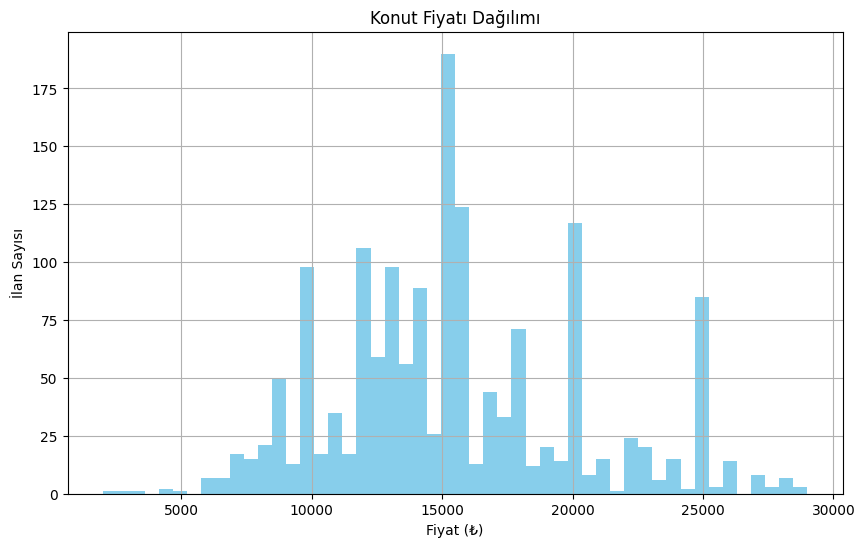

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue')
plt.title('Konut Fiyatı Dağılımı')
plt.xlabel('Fiyat (₺)')
plt.ylabel('İlan Sayısı')
plt.grid(True)
plt.show()

#### Konut fiyatlarının histogram grafiği, verilerin büyük kısmının 10.000–20.000 ₺ bandında yoğunlaştığını gösteriyor. Grafikte sağa çarpık bir dağılım görülüyor; bu da bazı yüksek fiyatlı konutların ortalamayı yükselttiğini ve aykırı değerlerin bulunduğunu göstermektedir. Bu durumda, fiyat verisinde log dönüşüm uygulamalıyız.

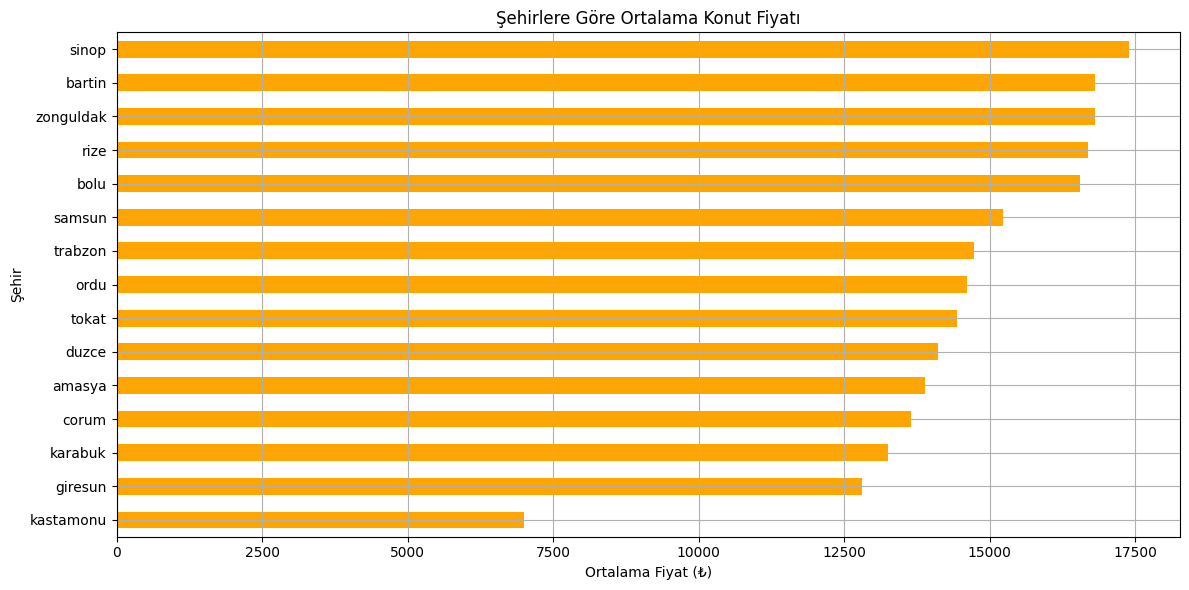

In [63]:
plt.figure(figsize=(12, 6))
df.groupby('city', observed=True)['price'].mean().sort_values().plot(kind='barh', color='orange')
plt.title('Şehirlere Göre Ortalama Konut Fiyatı')
plt.xlabel('Ortalama Fiyat (₺)')
plt.ylabel('Şehir')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Şehir bazında ortalama konut fiyatları incelendiğinde, en yüksek ortalama fiyatların Sinop, Bartın, Zonguldak ve Rize gibi sahil şehirlerinde yoğunlaştığı görülmektedir. Bu durum, Karadeniz bölgesindeki kıyı şehirlerinde konumun fiyatlar üzerindeki etkisini açıkça ortaya koymaktadır. Kastamonu ise ortalamanın oldukça altında kalmıştır.

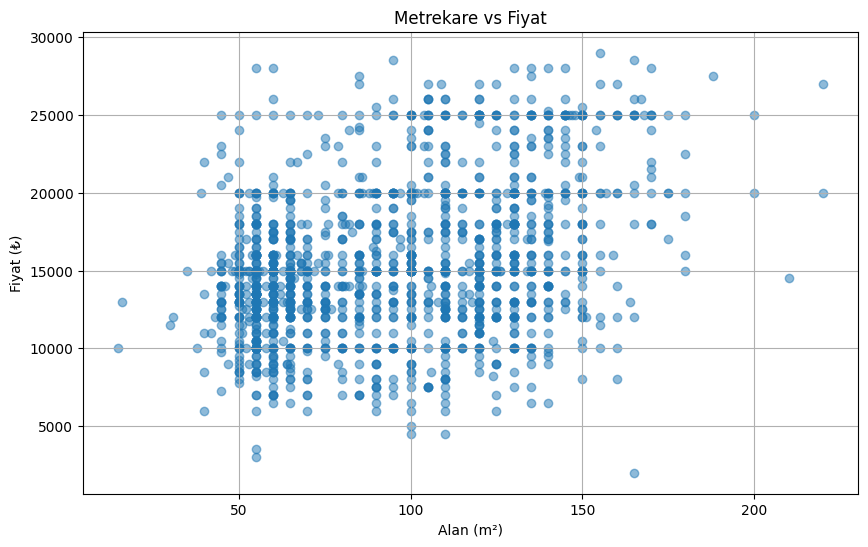

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.title('Metrekare vs Fiyat')
plt.xlabel('Alan (m²)')
plt.ylabel('Fiyat (₺)')
plt.grid(True)
plt.show()

#### Alan (m²) ile fiyat arasındaki ilişki incelendiğinde doğrudan bir doğrusal ilişki gözlemlenmemektedir. Ancak genel olarak daha büyük alanlara sahip konutların daha yüksek fiyatlardan listelendiği söylenebilir. Yoğun kümelenmeler 50–150 m² aralığında yoğunlaşmıştır. Ayrıca bazı düşük metrekareli ama yüksek fiyatlı konutlar (muhtemelen konum avantajı olan) dikkat çekmektedir.

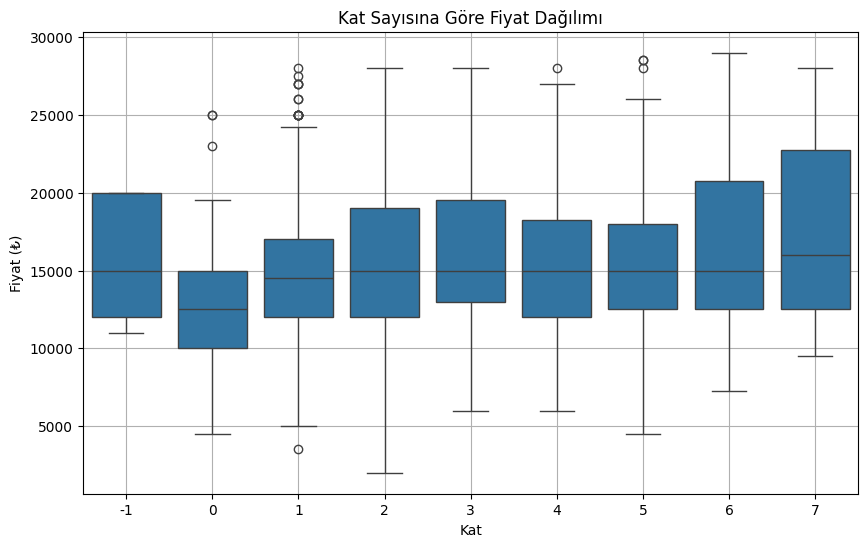

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floor', y='price', data=df)
plt.title('Kat Sayısına Göre Fiyat Dağılımı')
plt.xlabel('Kat')
plt.ylabel('Fiyat (₺)')
plt.grid(True)
plt.show()

#### Kat sayısına göre fiyat dağılımına bakıldığında, üst katlarda yer alan konutların fiyatlarının genellikle daha yüksek olduğu gözlenmektedir. Bu özellikle manzara ve gün ışığı gibi etkenlerle açıklanabilir. Ayrıca orta katlarda fiyat dağılımı daha homojenken, bazı kat seviyelerinde aykırı yüksek fiyatlar dikkat çekmektedir. -1 ve 0 katlardaki fiyatlar diğer katlara göre düşüktür, bu da zemin veya bodrum katların daha az tercih edildiğini gösterir.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model_pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("reg", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

log_preds = model_pipeline.predict(X_test)
y_pred = np.expm1(log_preds)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f} ₺")
print(f"MSE: {mse:.2f}")


R²: 0.982
RMSE: 623.39 ₺
MSE: 388613.71


In [70]:
reg_model = model_pipeline.named_steps['reg']

feature_importances = reg_model.feature_importances_

print("Numerical Features and Importances:")
for i in range(len(numerical_features)):
    print(f"{numerical_features[i]}: {feature_importances[i]:.4f}")


Numerical Features and Importances:
room: 0.0012
living_room: 0.0000
area: 0.3552
age: 0.0023
floor: 0.0010
price_per_m2: 0.6190
floor_per_age: 0.0020
room_density: 0.0012
area_per_room: 0.0081


In [71]:
print(df['living_room'].value_counts())

living_room
1    1589
Name: count, dtype: int64


In [72]:
print(df['living_room'].describe())

count    1589.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: living_room, dtype: float64


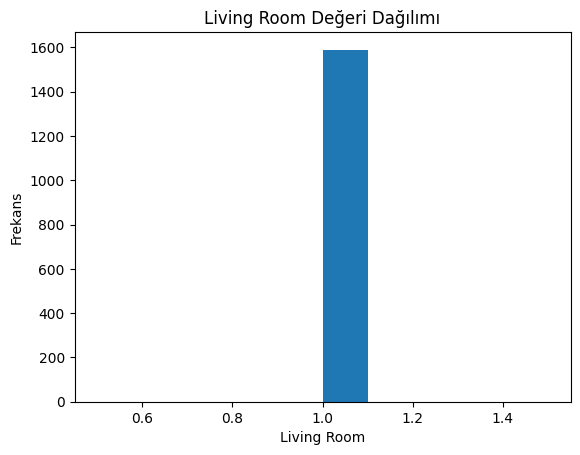

In [73]:
import matplotlib.pyplot as plt

plt.hist(df['living_room'], bins=10)
plt.title('Living Room Değeri Dağılımı')
plt.xlabel('Living Room')
plt.ylabel('Frekans')
plt.show()

In [74]:
from itertools import chain
ohe_categories = list(chain.from_iterable(
    model_pipeline.named_steps['prep'].transformers_[1][1].categories_))
for i, name in enumerate(ohe_categories):
    print(f"{name}: {feature_importances[len(numerical_features) + i]:.4f}")


amasya: 0.0001
bartin: 0.0000
bolu: 0.0002
corum: 0.0000
duzce: 0.0007
giresun: 0.0000
karabuk: 0.0001
kastamonu: 0.0000
ordu: 0.0000
rize: 0.0000
samsun: 0.0001
sinop: 0.0000
tokat: 0.0016
trabzon: 0.0001
zonguldak: 0.0003
19: 0.0000
akcaabat: 0.0000
akcakoca: 0.0005
alacam: -0.0000
alapli: 0.0001
altinordu: 0.0000
arsin: 0.0000
atakum: 0.0001
bafra: 0.0000
bulancak: 0.0000
canik: 0.0000
carsamba: 0.0000
caycuma: 0.0002
caykara: 0.0000
cumayeri: 0.0000
devrek: 0.0000
eregli: 0.0000
eskipazar: 0.0000
fatsa: 0.0000
gerede: 0.0000
gerze: 0.0000
gokcebey: 0.0000
gulyali: 0.0000
ilkadim: 0.0001
kavak: 0.0000
kilimli: 0.0000
kozlu: 0.0001
mengen: 0.0000
merkez: 0.0003
merzifon: 0.0000
mudurnu: 0.0000
niksar: 0.0001
of: 0.0000
ortahisar: 0.0001
osmancik: 0.0000
pazar: 0.0000
safranbolu: 0.0000
tekkekoy: 0.0000
terme: 0.0000
turhal: 0.0000
unye: 0.0000
vezirkopru: 0.0000
yenicaga: 0.0000
yomra: 0.0000
100_yil: 0.0001
19_mayis: 0.0000
2_nolu_besirli: 0.0000
3_nolu_erdogdu: 0.0000
5000_evler_75

In [75]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n {col} sütununda '19' içeren değerler:")
    print(df[df[col].astype(str).str.contains(r'\b19\b', na=False)][col].unique())


 img-link href sütununda '19' içeren değerler:
['https://www.hepsiemlak.com/duzce-merkez-yesiltepe-kiralik/daire/159099-19'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/106291-906'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/106291-905'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/63804-1095'
 'https://www.hepsiemlak.com/zonguldak-devrek-dedeoglu-dedeoglu-kiralik/daire/125446-19'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/106291-900'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/133058-324'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/106291-754'
 'https://www.hepsiemlak.com/zonguldak-kozlu-19-mayis-kiralik/daire/106291-878'
 'https://www.hepsiemlak.com/sinop-gerze-19-mayis-kiralik/daire/138639-70'
 'https://www.hepsiemlak.com/samsun-atakum-yenimahalle-kiralik/daire/155657-19'
 'https://www.hepsiemlak.com/samsun-ilkadim-19-mayis-kiralik/daire/1383

In [76]:
df = df[~df['district'].str.fullmatch(r'19(\.0)?')]

In [77]:
df['district'] = df['district'].cat.remove_unused_categories()

In [78]:
import numpy as np
df['price_log'] = np.log1p(df['price']) 

In [79]:
X = df[categorical_features + numerical_features]
y = df['price_log']
model_pipeline.fit(X, y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['room', 'living_room',
                                                   'area', 'age', 'floor',
                                                   'price_per_m2',
                                                   'floor_per_age',
                                                   'room_density',
                                                   'area_per_room']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'district',
                                                   'neighborhood'])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [80]:
for i in range(len(categorical_features)):
    print(model_pipeline.named_steps['prep'].transformers_[1][1].categories_[i])

['amasya' 'bartin' 'bolu' 'corum' 'duzce' 'giresun' 'karabuk' 'kastamonu'
 'ordu' 'rize' 'samsun' 'sinop' 'tokat' 'trabzon' 'zonguldak']
['akcaabat' 'akcakoca' 'alacam' 'alapli' 'altinordu' 'arsin' 'atakum'
 'bafra' 'bulancak' 'canik' 'carsamba' 'caycuma' 'caykara' 'cumayeri'
 'devrek' 'erbaa' 'eregli' 'eskipazar' 'fatsa' 'gerede' 'gerze' 'gokcebey'
 'gulyali' 'ilkadim' 'kavak' 'kilimli' 'kozlu' 'mengen' 'merkez'
 'merzifon' 'mudurnu' 'niksar' 'of' 'ortahisar' 'osmancik' 'pazar'
 'safranbolu' 'tekkekoy' 'terme' 'turhal' 'unye' 'vezirkopru' 'yenicaga'
 'yomra']
['100_yil' '19_mayis' '1_nolu_besirli' '2_nolu_besirli' '3_nolu_erdogdu'
 '5000_evler_75_yil' '5000_evler_bahcelievler' '5000_evler_cumhuriyet'
 '50_yil' 'abidehatun' 'ada' 'adalet' 'adatepe' 'ak_kent' 'akarca'
 'akbilek' 'akdegirmen' 'akinlar' 'aktas' 'aladag' 'alanli' 'alipasa'
 'alpagutbey' 'alparslan' 'altinyaprak' 'altiyuzevler' 'asagisoku'
 'atakent' 'atatepe' 'ataturk' 'atmeydani' 'ayazli' 'ayvaz' 'aziziye'
 'azmimilli' 'b

In [81]:
# print(df[df['district'].astype(str).str.fullmatch(r'19(\.0)?')])  # Artık boş dönmeli

In [82]:
def add_derived_features(df):
    df = df.copy()
    df['room_density'] = df['room'] / df['area']
    df['area_per_room'] = df['area'] / (df['room'] + df['living_room'])
    df['floor_per_age'] = df['floor'] / (df['age'] + 1)
    
    if 'price' in df.columns:
        df['price_per_m2'] = df['price'] / df['area']
    else:
        df['price_per_m2'] = mean_price_per_m2  
    
    return df


In [83]:
q1 = df['price'].quantile(0.33)   
q2 = df['price'].quantile(0.66)   

In [84]:
def classify_price(price, q1, q2):
    if price < q1:
        return "Düşük Segment"
    elif price < q2:
        return "Orta Segment"
    else:
        return "Yüksek Segment"


In [85]:
def predict_with_segment(features_df, model, q1, q2):
    features_df = add_derived_features(features_df)
    log_pred = model.predict(features_df)
    price_pred = np.expm1(log_pred)
    segment = classify_price(price_pred[0], q1, q2)

    print(f"Tahmini fiyat (₺): {price_pred[0]:,.0f}")
    print(f"Segment: {segment}")

    return price_pred[0], segment


In [86]:
new_data = pd.DataFrame({
    'city': ['rize'],
    'district': ['merkez'],
    'neighborhood': ['carsi'],
    'room': [2],
    'living_room': [1],
    'area': [90],
    'age': [2],
    'floor': [3]
})
predict_with_segment(new_data, model_pipeline, q1, q2)

Tahmini fiyat (₺): 14,697
Segment: Orta Segment


(14697.128820810782, 'Orta Segment')

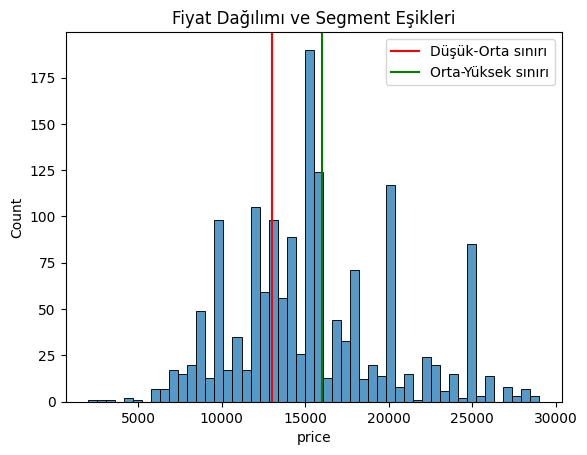

In [87]:
import seaborn as sns
sns.histplot(df['price'], bins=50)
plt.axvline(q1, color='red', label='Düşük-Orta sınırı')
plt.axvline(q2, color='green', label='Orta-Yüksek sınırı')
plt.legend()
plt.title("Fiyat Dağılımı ve Segment Eşikleri")
plt.show()


In [88]:
df[(df['city'] == 'rize') & (df['district'] == 'merkez') & (df['neighborhood'] == 'carsi')]['price'].describe()

count        4.000000
mean     16500.000000
std       6137.317547
min      12000.000000
25%      12000.000000
50%      14500.000000
75%      19000.000000
max      25000.000000
Name: price, dtype: float64

In [89]:
new_data = pd.DataFrame({
    'city': ['samsun'],
    'district': ['atakum'],
    'neighborhood': ['korfez'],
    'room': [1],
    'living_room': [1],
    'area': [60],
    'age': [3],
    'floor': [5]
})
predict_with_segment(new_data, model_pipeline, q1, q2)


Tahmini fiyat (₺): 9,623
Segment: Düşük Segment


(9623.466566202005, 'Düşük Segment')

In [90]:
df[(df['city'] == 'samsun') & (df['district'] == 'atakum') & (df['neighborhood'] == 'korfez')]


,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 3,celly 4,eids-badge__description,...,area,age,floor,price,price_per_m2,floor_per_age,room_density,area_per_room,log_price,price_log
875,https://www.hepsiemlak.com/samsun-atakum-korfe...,28.0,12000,01-07-2025,Kiralık Daire,1 + 1,65 m²,0 Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,65,0,3,12000,184.615385,3.000,0.5,32.500000,9.392745,9.392745
876,https://www.hepsiemlak.com/samsun-atakum-korfe...,26.0,11000,04-07-2025,Kiralık Daire,1 + 1,60 m²,3 Yaşında,1. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,60,3,1,11000,183.333333,0.250,0.5,30.000000,9.305741,9.305741
880,https://www.hepsiemlak.com/samsun-atakum-korfe...,27.0,8500,01-07-2025,Kiralık Daire,1 + 1,50 m²,0 Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,50,0,2,8500,170.000000,2.000,0.5,25.000000,9.047939,9.047939
881,https://www.hepsiemlak.com/samsun-atakum-korfe...,35.0,20000,06-07-2025,Kiralık Daire,2 + 1,100 m²,7 Yaşında,1. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,100,7,1,20000,200.000000,0.125,1.0,33.333333,9.903538,9.903538
885,https://www.hepsiemlak.com/samsun-atakum-korfe...,22.0,13500,05-07-2025,Kiralık Daire,1 + 1,52 m²,4 Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,52,4,3,13500,259.615385,0.600,0.5,26.000000,9.510519,9.510519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,https://www.hepsiemlak.com/samsun-atakum-korfe...,44.0,10500,12-06-2025,Kiralık Daire,1 + 1,63 m²,0 Yaşında,3. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,63,0,3,10500,166.666667,3.000,0.5,31.500000,9.259226,9.259226
1206,https://www.hepsiemlak.com/samsun-atakum-korfe...,10.0,13500,23-05-2025,Kiralık Daire,1 + 1,55 m²,1 Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,55,1,2,13500,245.454545,1.000,0.5,27.500000,9.510519,9.510519
1207,https://www.hepsiemlak.com/samsun-atakum-korfe...,8.0,13500,19-06-2025,Kiralık Daire,1 + 1,60 m²,5 Yaşında,Ara Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,60,5,3,13500,225.000000,0.500,0.5,30.000000,9.510519,9.510519
1210,https://www.hepsiemlak.com/samsun-atakum-korfe...,16.0,22500,05-06-2025,Kiralık Daire,1 + 1,70 m²,0 Yaşında,2. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,...,70,0,2,22500,321.428571,2.000,0.5,35.000000,10.021315,10.021315


In [91]:
new_data = pd.DataFrame({
    'city': ['trabzon'],
    'district': ['ortahisar'],
    'neighborhood': ['pelitli'],
    'room': [3],
    'living_room': [1],
    'area': [120],
    'age': [2],
    'floor': [3]
})
predict_with_segment(new_data, model_pipeline, q1, q2)

Tahmini fiyat (₺): 19,687
Segment: Yüksek Segment


(19687.312580161954, 'Yüksek Segment')

In [92]:
new_data = pd.DataFrame({
    'city': ['ordu'],
    'district': ['altinordu'],
    'neighborhood': ['bahceli'],
    'room': [2],
    'living_room': [1],
    'area': [60],
    'age': [9],
    'floor': [1]
})
predict_with_segment(new_data, model_pipeline, q1, q2)

Tahmini fiyat (₺): 9,441
Segment: Düşük Segment


(9441.38019268511, 'Düşük Segment')

In [93]:
new_data = pd.DataFrame({
    'city': ['giresun'],
    'district': ['merkez'],
    'neighborhood': ['camlik'],
    'room': [1],
    'living_room': [1],
    'area': [60],
    'age': [10],
    'floor': [1]
})
predict_with_segment(new_data, model_pipeline, q1, q2)

Tahmini fiyat (₺): 9,554
Segment: Düşük Segment


(9553.77384357839, 'Düşük Segment')